## KNN Regression on California Housing model

### Importing necessary package

In [2]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
sns.set(
    { "figure.figsize": (6, 4) },
    style='ticks',
    color_codes=True,
    font_scale=0.8
)
%config InlineBackend.figure_format = 'retina'
import warnings
warnings.filterwarnings('ignore')


In [4]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import PredictionErrorDisplay
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsRegressor

### Importing Dataset : California House Prices

In [5]:
from sklearn.datasets import fetch_california_housing
X,y = fetch_california_housing(return_X_y = True, as_frame = True)
california = pd.concat([X, y], axis = 1)

In [6]:
california.head(5)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422

### Data: Visulisations and Relationships

<Axes: xlabel='MedHouseVal', ylabel='Probability'>

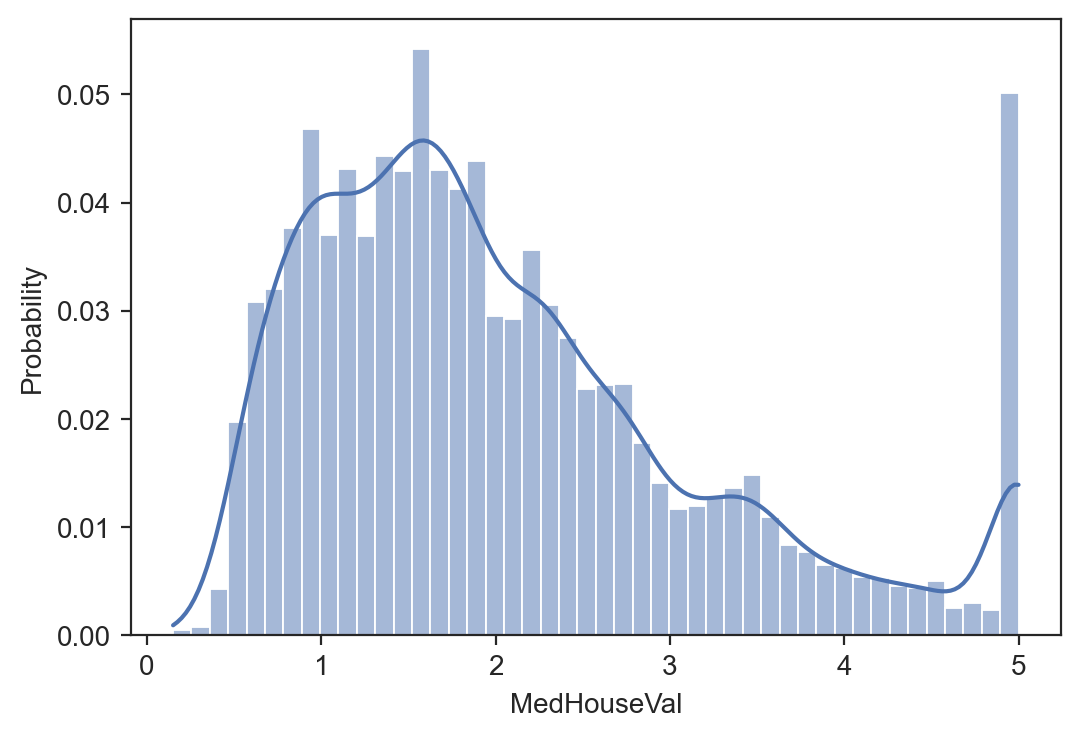

In [7]:
sns.histplot(data = california, x = 'MedHouseVal', kde = True, stat = 'probability' )

<Axes: xlabel='MedHouseVal'>

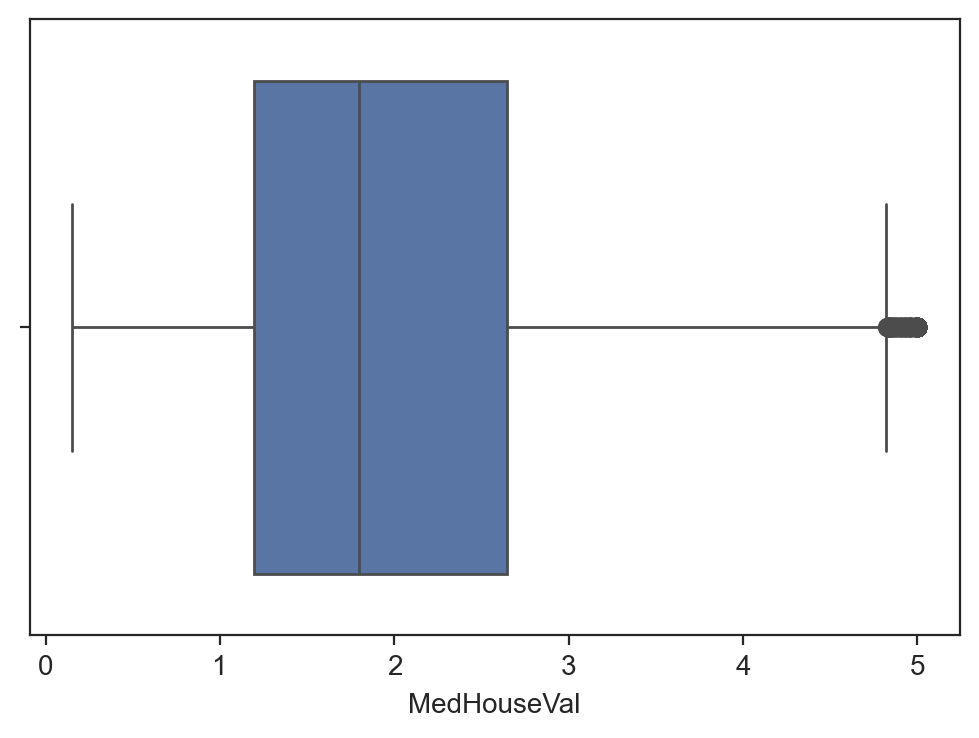

In [9]:
sns.boxplot(data = california, x='MedHouseVal')

<Axes: xlabel='MedHouseVal'>

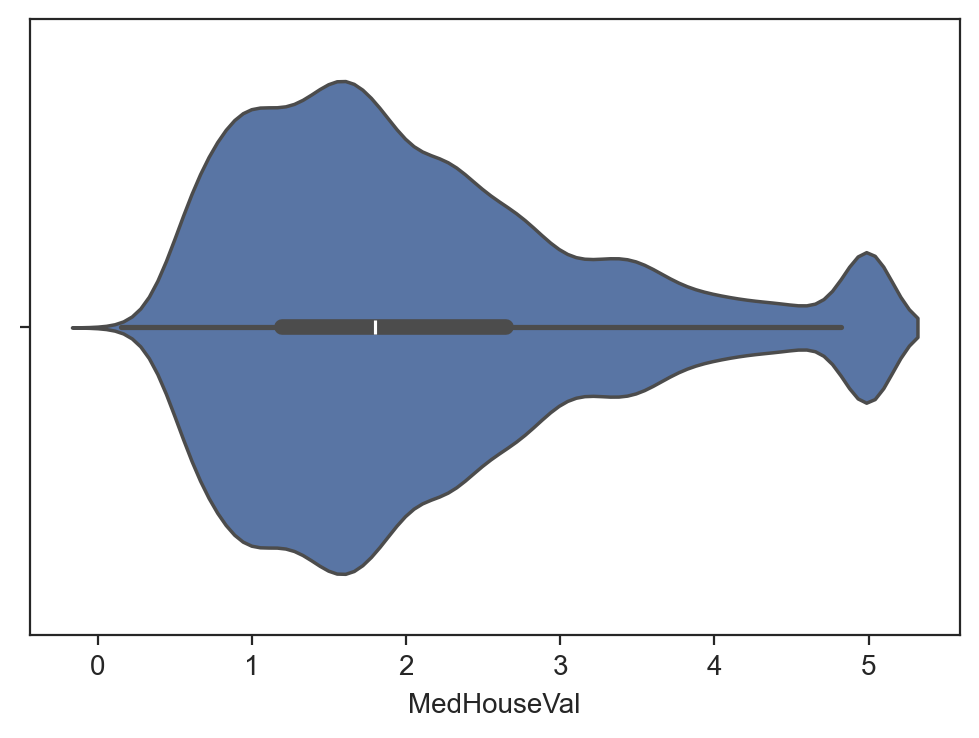

In [10]:
sns.violinplot(data = california, x = 'MedHouseVal')

### Feature/Target Relationships

In [11]:
california.head(1)

MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127    1.02381       322.0  2.555556     37.88   

   Longitude  MedHouseVal  
0    -122.23        4.526

<Axes: xlabel='MedInc', ylabel='MedHouseVal'>

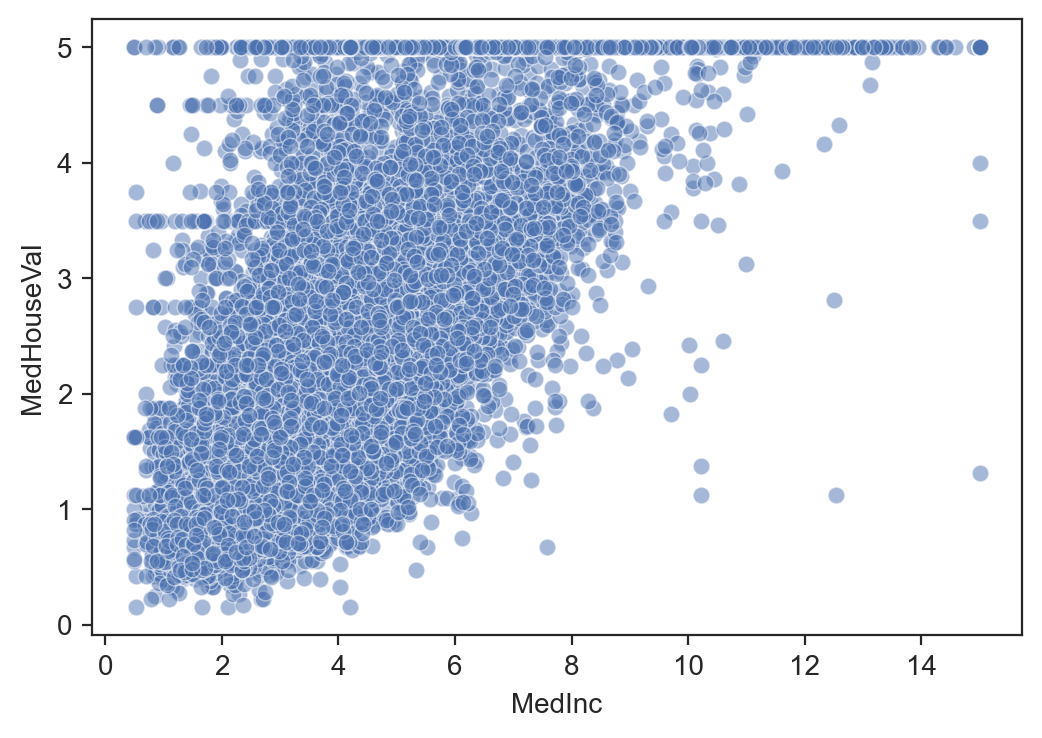

In [25]:
sns.scatterplot(data= california, x= 'MedInc', y = 'MedHouseVal', alpha = 0.5)

<Axes: xlabel='HouseAge', ylabel='MedHouseVal'>

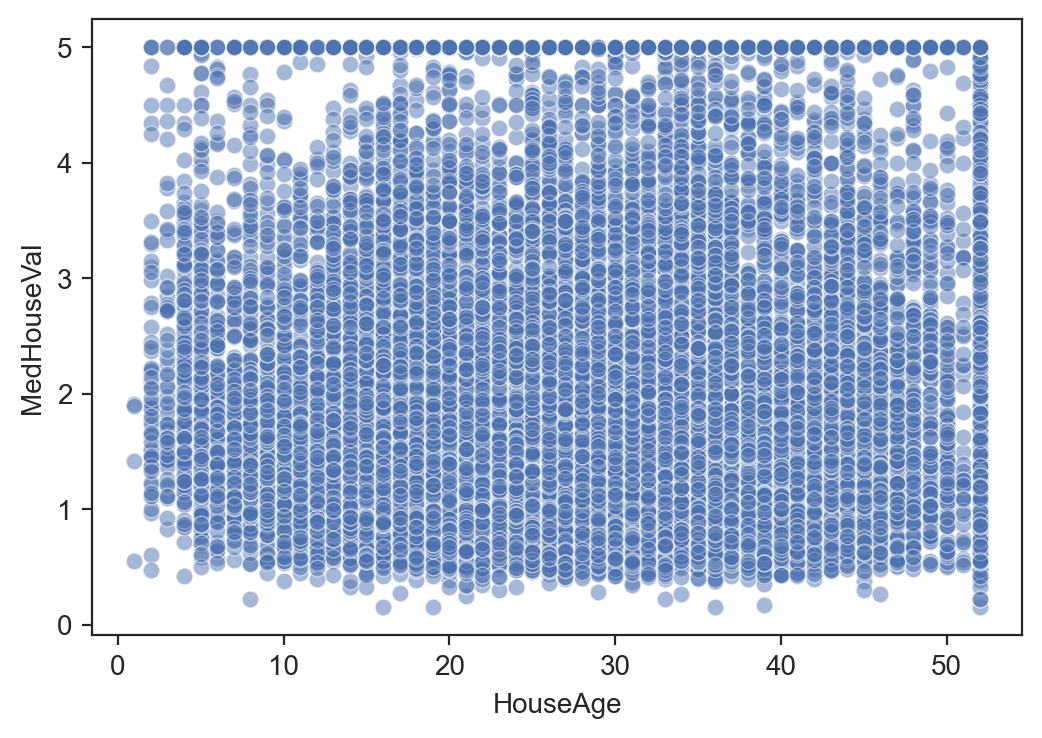

In [26]:
sns.scatterplot(data= california, x= 'HouseAge', y = 'MedHouseVal', alpha = 0.5)

<Axes: xlabel='AveRooms', ylabel='MedHouseVal'>

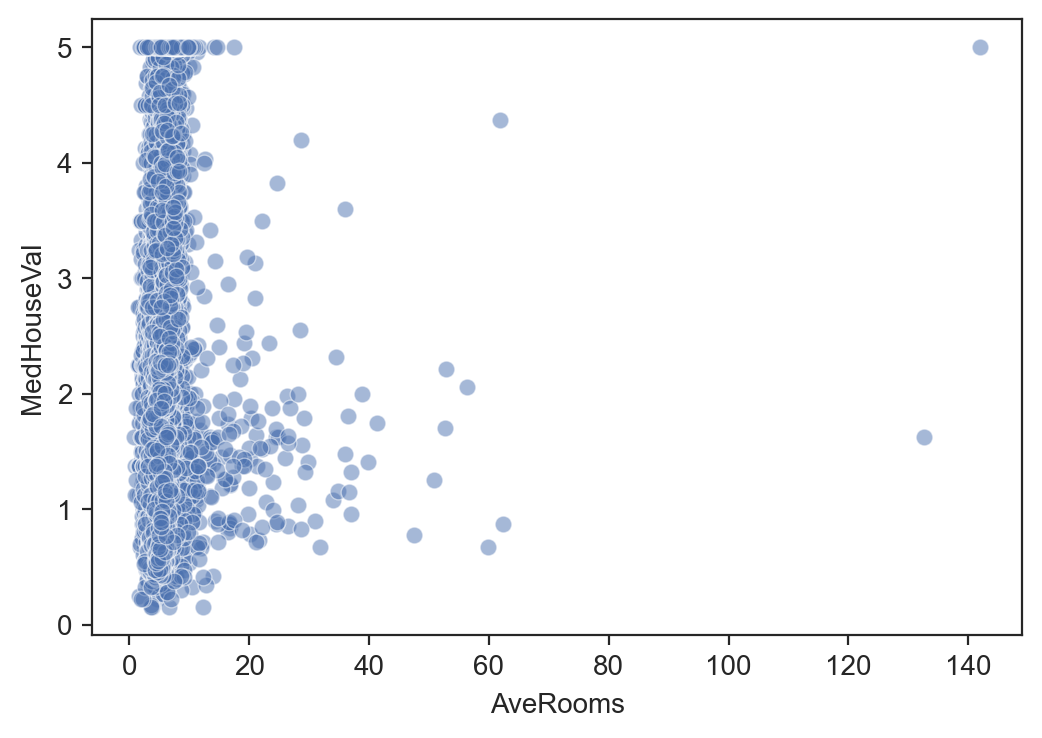

In [27]:
sns.scatterplot(data= california, x= 'AveRooms', y = 'MedHouseVal', alpha = 0.5)

<Axes: xlabel='AveBedrms', ylabel='MedHouseVal'>

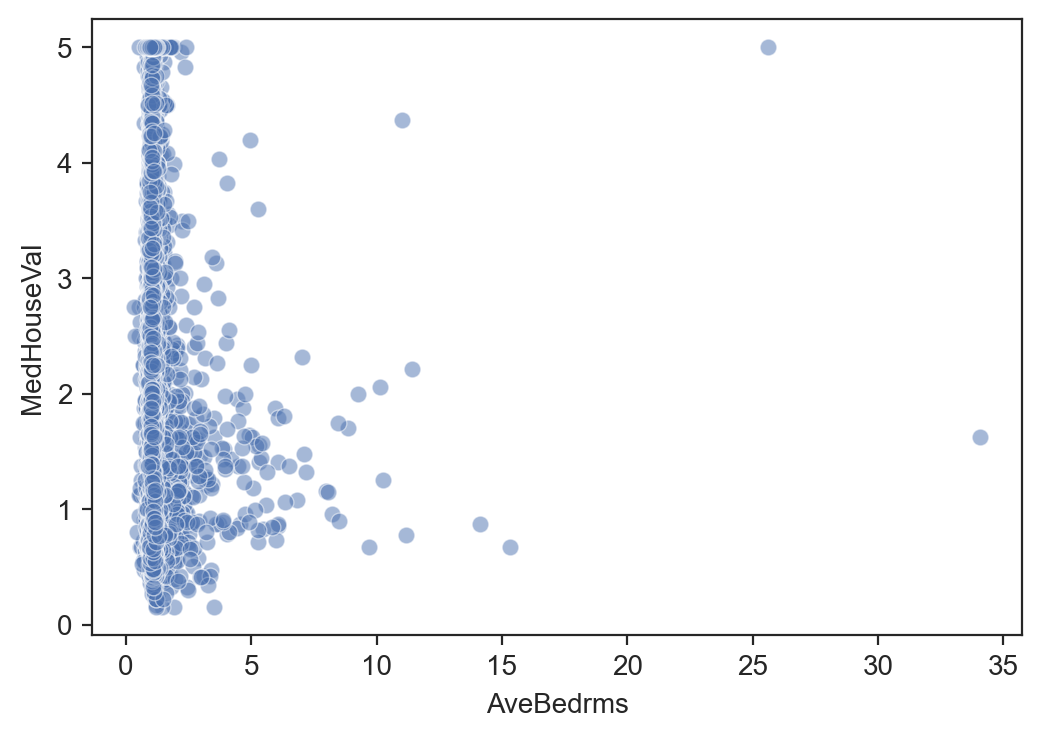

In [28]:
sns.scatterplot(data= california, x= 'AveBedrms', y = 'MedHouseVal', alpha = 0.5)

<Axes: xlabel='Population', ylabel='MedHouseVal'>

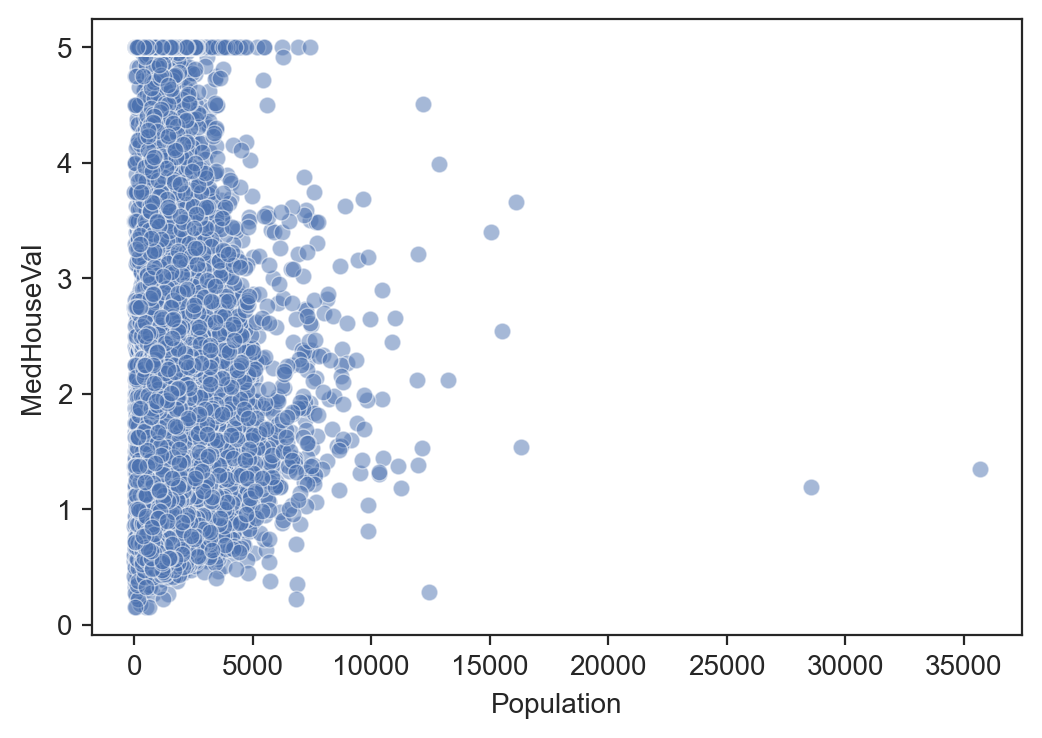

In [29]:
sns.scatterplot(data= california, x= 'Population', y = 'MedHouseVal', alpha = 0.5)

<Axes: xlabel='AveOccup', ylabel='MedHouseVal'>

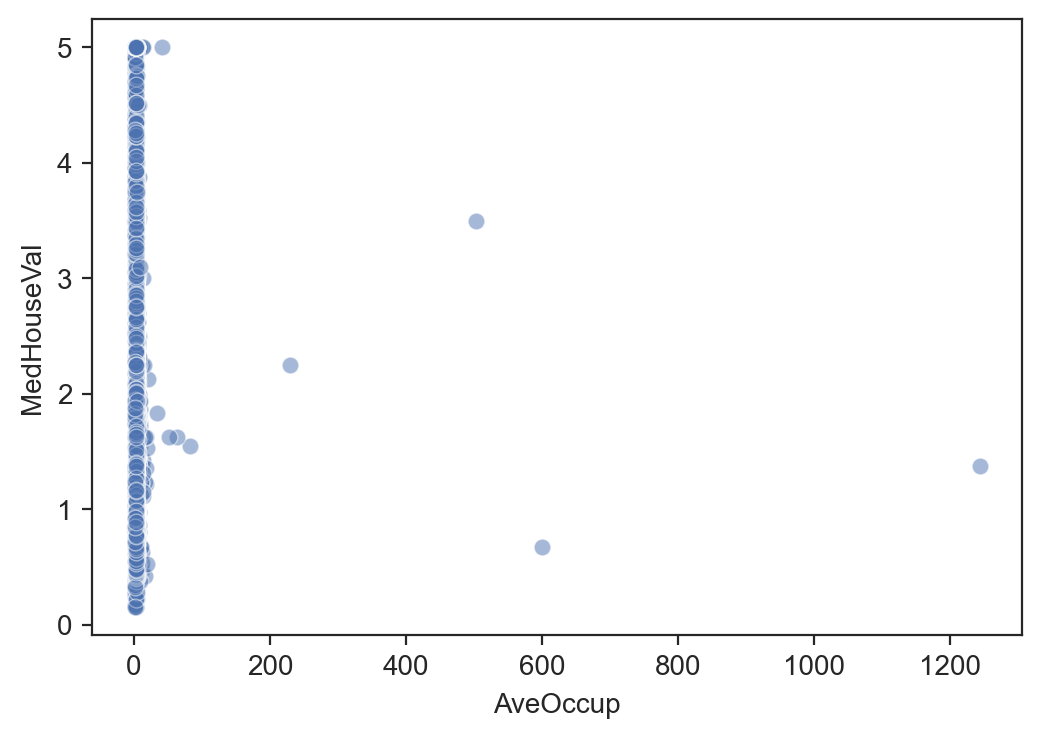

In [30]:
sns.scatterplot(data= california, x= 'AveOccup', y = 'MedHouseVal', alpha = 0.5)

<Axes: xlabel='Latitude', ylabel='MedHouseVal'>

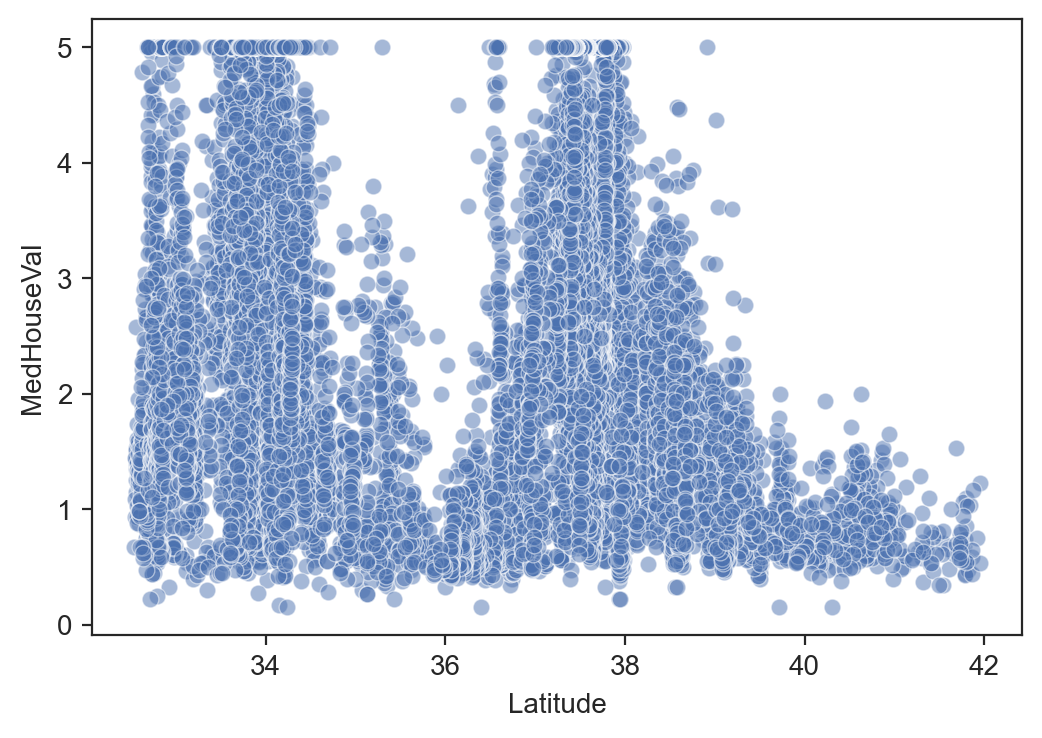

In [31]:
sns.scatterplot(data= california, x= 'Latitude', y = 'MedHouseVal', alpha = 0.5)

<Axes: xlabel='Longitude', ylabel='MedHouseVal'>

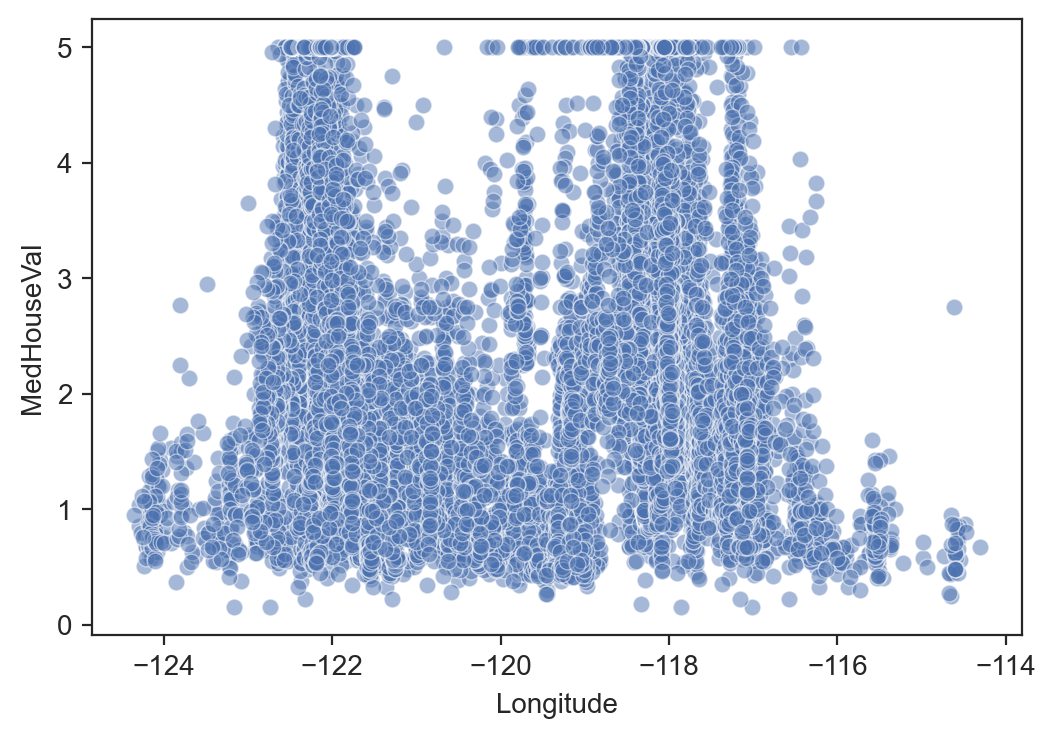

In [32]:
sns.scatterplot(data= california, x= 'Longitude', y = 'MedHouseVal', alpha = 0.5)

### kNN Regression Model

#### The X/Y Split


In [33]:
X = california.drop(columns='MedHouseVal')
y = california['MedHouseVal']

In [37]:
#Default split 75-25
X_train, X_test, y_train, y_test =  train_test_split(X,y, random_state = 45)
X_train.shape, X_test.shape

((15480, 8), (5160, 8))

#### Fitting the Model:

A kNN classifier takes the majority class of the neighbours as a prediction (e.g., non-diabetic); a kNN regressor produces the average value (e.g., mean) of the target from the neighbours (e.g., MedHouseVal).


We will be using MedInc and HouseAge as they have more spread on regression.

In [40]:
X_HouseAge = X[['HouseAge']]
X_MedInc = X[['MedInc']]

# for making visualisation of the kNN model easier, we will build it based on a couplr of feature

X_sample_train, X_sample_test = X_train[['MedInc', 'HouseAge']], X_test[['MedInc', 'HouseAge']]


In [42]:
knnr = KNeighborsRegressor(n_neighbors=11)
knnr.fit(X_sample_train, y_train)

KNeighborsRegressor(n_neighbors=11)

In [ ]:
a_linear_test_set = pd.DataFrame(
    np.linspace(X_HouseAge.min(), X_HouseAge.max(), 500), columns=X_sample_test.columns
)